# Building Metadata Exploration

### Import Data and Libraries

In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [10]:
# df - Dataframe that contains a 'RI-Aux-Other' Column
# Split the Research/Aux/Other Column
def split_RAO(df):
    df['RI'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[0]))
    df['Aux'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[1]))
    df['Other'] = df['RI-Aux-Other'].apply(lambda x: int(x.split('-')[2]))
    df = df.drop(['RI-Aux-Other'], axis=1)
    return df

In [11]:
# Importing the dataset
df = pd.read_csv('../data/bldg_info.csv')
df = split_RAO(df)
df

,Site,Facility,Name,Type,Category,Area,Status,Ownership,Primary Use,Condition,...,NonASF,FIR Pct Renov,Avg cost/sf,FIR year renov,Demo,Cty/dorm/apt/hse,Remarks,RI,Aux,Other
0,MainGT,002,"Skiles, William Vernon Classroom Building",BUILDING,M,139914,A,1,2,REM26-50,...,55115,43.0,175,1/1/1995 0:00,NaN,060/ - / - / -,Ground floor extended for bookstore 1962 or 63?,100,0,0
1,MainGT,003,"Robert, L.W. Alumni House",BUILDING,M,25645,A,1,1,SATIS,...,4698,100.0,160,1/1/1979 0:00,NaN,060/ - / - / -,RI UPDATE 11/18/11,50,0,50
2,MainGT,006,"Smith, John M. Residence Hall",BUILDING,M,63848,A,1,23,SATIS,...,15015,60.0,160,1/1/1993 0:00,NaN,060/0283-0283/0001-0001/ -,Exercise/sunroom addition 1993? 1% RI - AVPFAC...,1,99,0
3,MainGT,007,"Brown, Julius Residence Hall",BUILDING,M,17423,A,1,22,SATIS,...,3267,60.0,130,1/1/1993 0:00,NaN,060/0089-0089/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat...",1,99,0
4,MainGT,010,"Howell, Clark Residence Hall",BUILDING,M,23933,A,1,22,SATIS,...,6012,80.0,130,1/1/1999 0:00,NaN,060/0122-0122/ - / -,"1% RI - AVPFAC request 2/2011, Steam/chill wat...",1,99,0
5,MainGT,011,"Harris, Nathanial E. Residence Hall",BUILDING,M,25558,A,1,22,SATIS,...,8230,100.0,130,1/1/1992 0:00,NaN,060/0092-0092/0000-0000/ -,Attic space renovated 1970 or 71? 1% RI - AVPF...,1,99,0
6,MainGT,012,"Brittain, Marion L. Dining Hall",BUILDING,M,19986,A,1,8,SATIS,...,2415,60.0,160,1/1/2001 0:00,NaN,060/ - / - / -,NaN,0,100,0
7,MainGT,013,"Cloudman, Josiah Residence Hall",BUILDING,M,23117,A,1,22,SATIS,...,5204,60.0,130,1/1/1995 0:00,NaN,060/0117-0117/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat...",1,99,0
8,MainGT,014,"Harrison, George W. Jr. Residence Hall",BUILDING,M,30526,A,1,22,SATIS,...,6095,80.0,130,1/1/1998 0:00,NaN,060/0151-0151/0001-0001/ -,"1% RI - AVPFAC request 2/2011, Steam/chill wat...",1,99,0
9,MainGT,015,"Towers, Donigan D. Residence Hall",BUILDING,M,59986,A,1,23,SATIS,...,21864,100.0,130,1/1/2014 0:00,NaN,060/0254-0254/0001-0001/ -,"1% RI - AVPFAC request 3/2011, Steam/chill wat...",1,99,0


In [13]:
#df_bldg.columns

In [15]:
#list(df['Facility'])

In [16]:
df = df[['Facility','ASF', 'Constr Cost', 'RI', 'Aux', 'Other', 'GT Category', 'Condition']]
df

,Facility,ASF,Constr Cost,RI,Aux,Other,GT Category,Condition
0,002,71356.0,2037000,100,0,0,ACADI&R,REM26-50
1,003,15982.0,1142000,50,0,50,CAMPSUPP,SATIS
2,006,40141.0,614000,1,99,0,RESIDENT,SATIS
3,007,10985.0,93000,1,99,0,RESIDENT,SATIS
4,010,14697.0,163000,1,99,0,RESIDENT,SATIS
5,011,13240.0,534000,1,99,0,RESIDENT,SATIS
6,012,14280.0,418000,0,100,0,STUDSUPP,SATIS
7,013,13832.0,128000,1,99,0,RESIDENT,SATIS
8,014,19616.0,183000,1,99,0,RESIDENT,SATIS
9,015,29971.0,481000,1,99,0,RESIDENT,SATIS


In [68]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
Facility,002,003,006,007,010,011,012,013,014,015,...,201,203,209,212,709,720,785,791,850,876
ASF,71356,15982,40141,10985,14697,13240,14280,13832,19616,29971,...,216,44076,34902,2054,3800,2907,24719,9239,89166,16713
Constr Cost,2037000,1142000,614000,93000,163000,534000,418000,128000,183000,481000,...,950000,11373120,18400000,386000,85000,1000,1000,1000,1000,1000
RI,100,50,1,1,1,1,0,1,1,1,...,0,0,50,100,0,100,100,0,66,100
Aux,0,0,99,99,99,99,100,99,99,99,...,0,0,50,0,100,0,0,0,22,0
Other,0,50,0,0,0,0,0,0,0,0,...,100,100,0,0,0,0,0,100,12,0
GT Category,ACADI&R,CAMPSUPP,RESIDENT,RESIDENT,RESIDENT,RESIDENT,STUDSUPP,RESIDENT,RESIDENT,RESIDENT,...,STUDSUPP,ATHASSOC,STUDSUPP,STUDSUPP,OTHER,ACADSUPP,ACADI&R,OTHER,ACADI&R,ACADSUPP
Condition,REM26-50,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,...,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS,SATIS


In [17]:
b = df.transpose().to_json(orient='split')
b_loaded = json.loads(b)
b_loaded

{'columns': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,


In [18]:
b_loaded['data'][3] = sum(b_loaded['data'][3])

In [19]:
b_loaded['data'][4] = sum(b_loaded['data'][4])

In [20]:
b_loaded['data'][5] = sum(b_loaded['data'][5])

In [22]:
import collections

In [25]:
arr = b_loaded['data'][6]
arr

['ACADI&R',
 'CAMPSUPP',
 'RESIDENT',
 'RESIDENT',
 'RESIDENT',
 'RESIDENT',
 'STUDSUPP',
 'RESIDENT',
 'RESIDENT',
 'RESIDENT',
 'RESIDENT',
 'RESIDENT',
 'ATHASSOC',
 'ATHASSOC',
 'ATHASSOC',
 'STUDSUPP',
 'ACADI&R',
 'ACADI&R',
 'CAMPSUPP',
 'ACADI&R',
 'ACADSUPP',
 'CAMPSUPP',
 'CAMPSUPP',
 'CAMPSUPP',
 'CAMPSUPP',
 'ACADSUPP',
 'STUDSUPP',
 'ATHASSOC',
 'CAMPSUPP',
 'ATHASSOC',
 'ATHASSOC',
 'CAMPSUPP',
 'ACADSUPP',
 'ACADSUPP',
 'ACADSUPP',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'CAMPSUPP',
 'CAMPSUPP',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'CAMPSUPP',
 'CAMPSUPP',
 'CAMPSUPP',
 'CAMPSUPP',
 'RESIDENT',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'CAMPSUPP',
 'RESIDENT',
 'RESIDENT',
 'ACADI&R',
 'ACADI&R',
 'CAMPSUPP',
 'CAMPSUPP',
 'RESIDENT',
 'RESIDENT',
 'STUDSUPP',
 'ATHASSOC',
 'ATHASSOC',
 'ATHASSOC',
 'CAMPSUPP',
 'ACADI&R',
 'ACADI&R',
 'ACADSUPP',
 'ATHASSOC',
 'ACADI&R',
 'CAMPSUPP',
 'ACADI&R',
 'ACADI&R',
 'ACADI&R',
 'RESIDENT'

In [44]:
gt_category_uniq = list(np.unique(np.array(b_loaded['data'][6]), return_counts=True)[0])

In [45]:
gt_category_ct = list(np.unique(np.array(b_loaded['data'][6]), return_counts=True)[1])

In [47]:
b_loaded['data'][6] = gt_category_uniq.extend(gt_category_ct)

In [48]:
b_loaded['data'][6]

In [ ]:
gt_category_unique = list(np.unique(np.array(b_loaded['data'][6]), return_counts=True)[0])

In [34]:
c

In [23]:
final_counts = dict(collections.Counter(b_loaded['data'][6]))

In [80]:
b_loaded['data']

[['002',
  '003',
  '006',
  '007',
  '010',
  '011',
  '012',
  '013',
  '014',
  '015',
  '016',
  '016A',
  '017',
  '018',
  '018A',
  '020',
  '022',
  '022A',
  '023A',
  '024',
  '025',
  '026',
  '029A',
  '029B',
  '029C',
  '030',
  '031',
  '032',
  '033',
  '033A',
  '033B',
  '033C',
  '035',
  '036',
  '038',
  '039',
  '040',
  '041',
  '045',
  '046',
  '047',
  '050',
  '051',
  '051A',
  '051B',
  '051C',
  '051D',
  '051F',
  '052',
  '055',
  '056',
  '057',
  '058',
  '059',
  '060A',
  '062',
  '064',
  '065',
  '066',
  '066A',
  '067',
  '067A',
  '071',
  '071A',
  '072',
  '073',
  '073A',
  '073B',
  '074',
  '075',
  '076',
  '077',
  '080A',
  '081',
  '083C',
  '084',
  '085',
  '086',
  '090',
  '091',
  '092',
  '093',
  '094',
  '095',
  '098',
  '100',
  '101',
  '103',
  '103A',
  '104',
  '104A',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '114',
  '114A',
  '115',
  '116',
  '117',
  '118',
  '119',
  '123',
  '124',
  '125',
  

In [48]:
data = {
    "buildings": list(df['Facility']),
    "ASF": list(df['ASF']),
    "Constr Cost": list(df['Constr Cost']),
    "RI-Aux-Other Labels": list(["RI", "Aux", "Other"]),
    "RI-Aux-Other Totals": list([df['RI'].sum(), df['Aux'].sum(), df['Other'].sum()]),
    "GT Category Types": list(df.groupby("GT Category").size().index),
    "Gt Category Counts": list(df.groupby("GT Category").size().values),
    "Condition Types": list(df.groupby("Condition").size().index),
    "Condition Counts": list(df.groupby("Condition").size().values),
}

data

{'ASF': [71356.0,
  15982.0,
  40141.0,
  10985.0,
  14697.0,
  13240.0,
  14280.0,
  13832.0,
  19616.0,
  29971.0,
  39124.0,
  4391.0,
  125124.0,
  45340.0,
  28046.0,
  328.0,
  11807.0,
  2402.0,
  1975.0,
  23027.0,
  4102.0,
  1251.0,
  13545.0,
  10080.0,
  795.0,
  20318.0,
  26362.0,
  5445.0,
  66431.0,
  27045.0,
  5207.0,
  744.0,
  24585.0,
  6816.0,
  15765.0,
  11707.0,
  14293.0,
  24224.0,
  40022.0,
  8756.0,
  68364.0,
  82734.0,
  12827.0,
  10937.0,
  4404.0,
  4862.0,
  25903.0,
  nan,
  82186.0,
  22765.0,
  34767.0,
  32615.0,
  17198.0,
  6653.0,
  7483.0,
  nan,
  99937.0,
  115579.0,
  8274.0,
  27276.0,
  7183.0,
  5994.0,
  8360.0,
  1415.0,
  1856.0,
  113833.0,
  9179.0,
  16669.0,
  6335.0,
  35194.0,
  35798.0,
  64973.0,
  297.0,
  79523.0,
  8154.0,
  29701.0,
  96159.0,
  81891.0,
  16282.0,
  20971.0,
  13528.0,
  14636.0,
  15942.0,
  47451.0,
  21567.0,
  70215.0,
  34986.0,
  87944.0,
  366.0,
  74702.0,
  4480.0,
  4856.0,
  8832.0,
  14895.0,

In [ ]:
data = {
    "buildings": list(df['Facility']),
    "ASF": list(df['ASF']),
    "Constr Cost": list(df['Constr Cost']),
    "RI-Aux-Other Labels": list(["RI", "Aux", "Other"]),
    "RI-Aux-Other Totals": list([df['RI'].sum(), df['Aux'].sum(), df['Other'].sum()]),
    "GT Category Types": list(df.groupby("GT Category").size().index),
    "Gt Category Counts": list(df.groupby("GT Category").size().values),
    "Condition Types": list(df.groupby("Condition").size().index),
    "Condition Counts": list(df.groupby("Condition").size().values),
}

In [5]:
#pd.DataFrame(data)

In [53]:
r = {'is_claimed': 'True', 'rating': 3.5}
r = json.dumps(r)
r

'{"rating": 3.5, "is_claimed": "True"}'

#### Initial Data Exploration Functions

In [28]:
# Classification Distribution Analysis of a List
# param arr (array): List of elements to be analyzed
import collections
def distr_analysis(arr):
    print('Data Distribution Analysis' + '\n')
    final_counts = dict(collections.Counter(arr))
    print(final_counts)
    total = len(arr)
    for k,v in final_counts.items(): print('Type ' + str(k) + ': ' + str(round(v/total * 100, 2)) + '%' )
    plt.hist(arr)
    plt.show()

#### Building Area

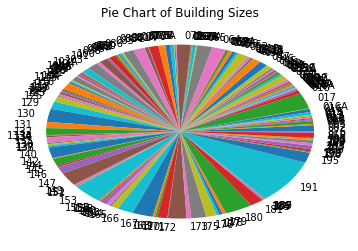

In [16]:
area = df['Area']
plt.pie(x=area, labels=bldgs)
plt.title('Pie Chart of Building Sizes')
#plt.figure(figsize=(20,10))
plt.show()

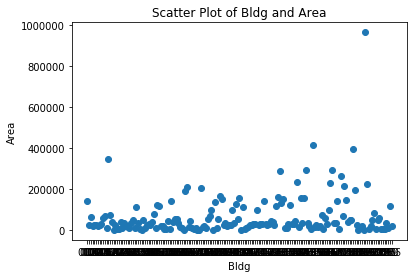

In [65]:
plt.scatter(x=bldgs, y=area)
plt.title('Scatter Plot of Bldg and Area')
plt.xlabel('Bldg')
plt.ylabel('Area')
plt.show()

#### Primary Use Distribution

In [17]:
primary_use = df['Primary Use']

Data Distribution Analysis

{1: 49, 2: 17, 3: 5, 4: 36, 5: 1, 6: 5, 7: 2, 8: 8, 9: 9, 10: 6, 15: 2, 16: 1, 20: 1, 21: 2, 22: 12, 23: 18, 24: 1}
Type 1: 28.0%
Type 2: 9.71%
Type 3: 2.86%
Type 4: 20.57%
Type 5: 0.57%
Type 6: 2.86%
Type 7: 1.14%
Type 8: 4.57%
Type 9: 5.14%
Type 10: 3.43%
Type 15: 1.14%
Type 16: 0.57%
Type 20: 0.57%
Type 21: 1.14%
Type 22: 6.86%
Type 23: 10.29%
Type 24: 0.57%


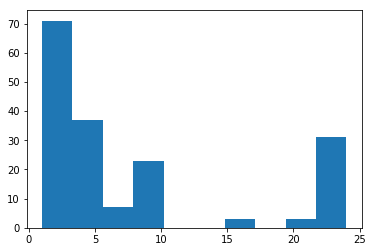

In [29]:
distr_analysis(primary_use)

In [30]:
d = {1: 49, 2: 17, 3: 5, 4: 36, 5: 1, 6: 5, 7: 2, 8: 8, 9: 9, 10: 6, 15: 2, 16: 1, 20: 1, 21: 2, 22: 12, 23: 18, 24: 1}

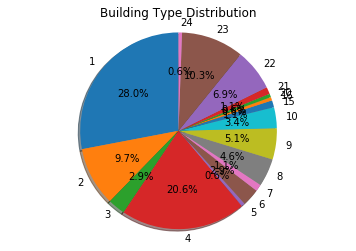

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = d.keys()
sizes = d.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Building Type Distribution')
plt.show()

#### GT Category Distribution

In [43]:
gt_category = df['GT Category']

Data Distribution Analysis

{'STUDSUPP': 16, 'ATHASSOC': 14, 'ACADI&R': 60, 'OTHER': 4, 'RESIDENT': 35, 'CAMPSUPP': 35, 'ACADSUPP': 11}
Type STUDSUPP: 9.14%
Type ATHASSOC: 8.0%
Type ACADI&R: 34.29%
Type OTHER: 2.29%
Type RESIDENT: 20.0%
Type CAMPSUPP: 20.0%
Type ACADSUPP: 6.29%


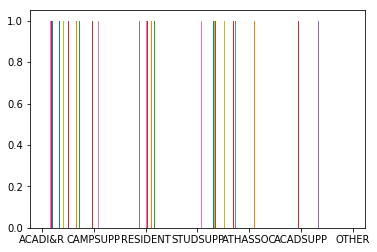

In [44]:
distr_analysis(gt_category)

In [45]:
d = {'STUDSUPP': 16, 'ATHASSOC': 14, 'ACADI&R': 60, 'OTHER': 4, 'RESIDENT': 35, 'CAMPSUPP': 35, 'ACADSUPP': 11}

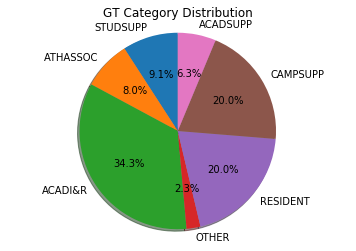

In [46]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = d.keys()
sizes = d.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('GT Category Distribution')
plt.show()

#### Avg_cost

In [47]:
avg_cost = df['Avg cost/sf']

Data Distribution Analysis

{130: 18, 195: 2, 200: 1, 75: 1, 140: 27, 145: 5, 215: 8, 90: 1, 220: 6, 160: 30, 35: 2, 550: 5, 105: 6, 170: 3, 45: 1, 110: 1, 175: 10, 50: 1, 180: 6, 120: 8, 250: 21, 190: 12}
Type 130: 10.29%
Type 195: 1.14%
Type 200: 0.57%
Type 75: 0.57%
Type 140: 15.43%
Type 145: 2.86%
Type 215: 4.57%
Type 90: 0.57%
Type 220: 3.43%
Type 160: 17.14%
Type 35: 1.14%
Type 550: 2.86%
Type 105: 3.43%
Type 170: 1.71%
Type 45: 0.57%
Type 110: 0.57%
Type 175: 5.71%
Type 50: 0.57%
Type 180: 3.43%
Type 120: 4.57%
Type 250: 12.0%
Type 190: 6.86%


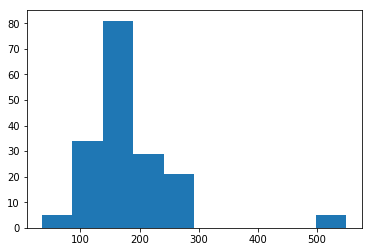

In [48]:
distr_analysis(avg_cost)

In [49]:
d = {130: 18, 195: 2, 200: 1, 75: 1, 140: 27, 145: 5, 215: 8, 90: 1, 220: 6, 160: 30, 35: 2, 550: 5, 105: 6, 170: 3, 45: 1, 110: 1, 175: 10, 50: 1, 180: 6, 120: 8, 250: 21, 190: 12}

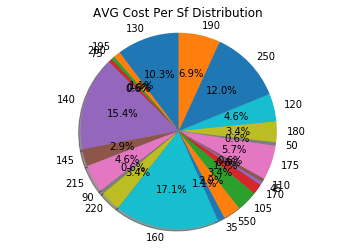

In [51]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = d.keys()
sizes = d.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('AVG Cost Per Sf Distribution')
plt.show()

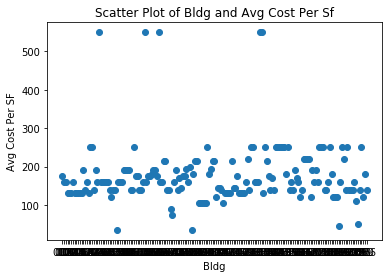

In [64]:
plt.scatter(x=bldgs, y=avg_cost)
plt.title('Scatter Plot of Bldg and Avg Cost Per Sf')
plt.xlabel('Bldg')
plt.ylabel('Avg Cost Per SF')
plt.show()

#### Area vs Construction Cost Analysis

In [54]:
constr_cost = df['Constr Cost']

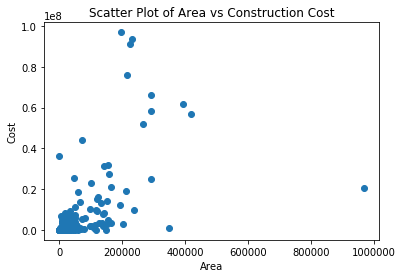

In [63]:
plt.scatter(x=area, y=constr_cost)
plt.title('Scatter Plot of Area vs Construction Cost')
plt.xlabel('Area')
plt.ylabel('Cost')
plt.show()

#### Condition

In [66]:
condition = df['Condition']

Data Distribution Analysis

{'REM26-50': 9, 'REM<26': 6, 'REM>51': 7, 'SATIS': 153}
Type REM26-50: 5.14%
Type REM<26: 3.43%
Type REM>51: 4.0%
Type SATIS: 87.43%


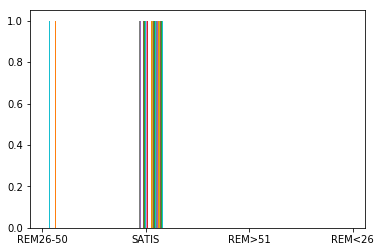

In [67]:
distr_analysis(condition)

In [68]:
d = {'REM26-50': 9, 'REM<26': 6, 'REM>51': 7, 'SATIS': 153}

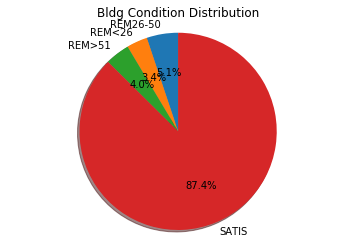

In [69]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = d.keys()
sizes = d.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bldg Condition Distribution')
plt.show()

#### Construction Date Distribution

In [70]:
constr_date = df['Constr Date']

In [78]:
new_dates = []
for i in constr_date: new_dates.append(i.split()[0].split('/')[2])
constr_date = new_dates

In [82]:
'''
plt.scatter(x=bldgs, y=constr_date)
plt.title('Construction Year of Buildings')
plt.xlabel('Bldg')
plt.ylabel('Year')
plt.figure(figsize=(50,50))
plt.show()
'''

"\nplt.scatter(x=bldgs, y=constr_date)\nplt.title('Construction Year of Buildings')\nplt.xlabel('Bldg')\nplt.ylabel('Year')\nplt.figure(figsize=(50,50))\nplt.show()\n"

Data Distribution Analysis

{'1930': 2, '1964': 1, '2017': 2, '1970': 3, '1942': 1, '1939': 4, '1925': 3, '1948': 3, '1935': 1, '1981': 1, '1998': 2, '1988': 4, '2004': 1, '1888': 1, '1999': 1, '1900': 1, '1986': 4, '1983': 3, '1950': 1, '1992': 5, '1996': 1, '1967': 3, '1911': 1, '1961': 6, '1928': 1, '1901': 1, '1926': 1, '1952': 1, '1924': 4, '2011': 3, '2006': 5, '1953': 1, '2000': 4, '2012': 2, '1910': 1, '1972': 3, '1995': 9, '1969': 8, '2009': 1, '1991': 1, '2008': 2, '1898': 1, '1985': 4, '1955': 3, '1980': 3, '2002': 4, '1951': 2, '1968': 3, '1914': 1, '1923': 1, '1982': 1, '1973': 1, '1957': 1, '1906': 2, '1975': 1, '1938': 1, '1994': 1, '1959': 2, '2001': 7, '2013': 1, '1931': 1, '1941': 1, '1947': 4, '1989': 3, '2015': 2, '1920': 1, '1987': 4, '2007': 1, '1984': 3, '1990': 2, '1971': 1, '1949': 2, '2003': 4, '1927': 2, '1979': 1}
Type 1930: 1.14%
Type 1964: 0.57%
Type 2017: 1.14%
Type 1970: 1.71%
Type 1942: 0.57%
Type 1939: 2.29%
Type 1925: 1.71%
Type 1948: 1.71%
Type 1935:

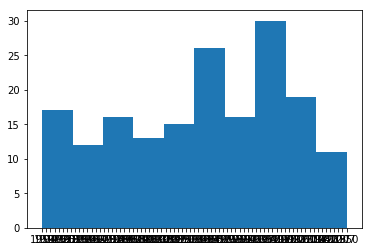

In [83]:
distr_analysis(constr_date)

In [84]:
d = {'1930': 2, '1964': 1, '2017': 2, '1970': 3, '1942': 1, '1939': 4, '1925': 3, '1948': 3, '1935': 1, '1981': 1, '1998': 2, '1988': 4, '2004': 1, '1888': 1, '1999': 1, '1900': 1, '1986': 4, '1983': 3, '1950': 1, '1992': 5, '1996': 1, '1967': 3, '1911': 1, '1961': 6, '1928': 1, '1901': 1, '1926': 1, '1952': 1, '1924': 4, '2011': 3, '2006': 5, '1953': 1, '2000': 4, '2012': 2, '1910': 1, '1972': 3, '1995': 9, '1969': 8, '2009': 1, '1991': 1, '2008': 2, '1898': 1, '1985': 4, '1955': 3, '1980': 3, '2002': 4, '1951': 2, '1968': 3, '1914': 1, '1923': 1, '1982': 1, '1973': 1, '1957': 1, '1906': 2, '1975': 1, '1938': 1, '1994': 1, '1959': 2, '2001': 7, '2013': 1, '1931': 1, '1941': 1, '1947': 4, '1989': 3, '2015': 2, '1920': 1, '1987': 4, '2007': 1, '1984': 3, '1990': 2, '1971': 1, '1949': 2, '2003': 4, '1927': 2, '1979': 1}

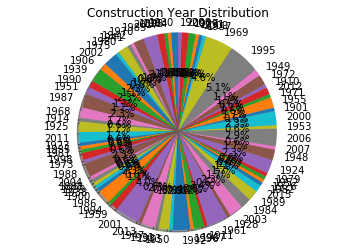

In [85]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = d.keys()
sizes = d.values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Construction Year Distribution')
plt.show()

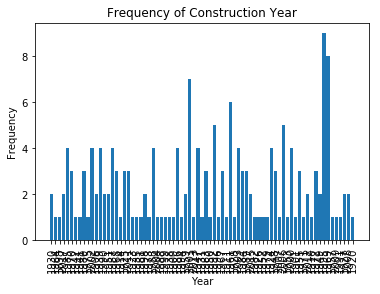

<Figure size 720000x720 with 0 Axes>

In [99]:
plt.bar(x=list(d.keys()), height=list(d.values()))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of Construction Year')
plt.xticks(list(d.keys()), labels, rotation='vertical')
plt.figure(figsize=(10000,10))
plt.show()

# Ensemble Classifier Accurcay and Size at Different Threshold Sizes

In [52]:
thresh = [0, 20, 40, 60, 80, 100, 120, 140]
thresh[:] = [x / 4 for x in thresh]
acc = [84, 85.3, 87, 88.7, 88.9, 87.6, 89.1, 89.9]

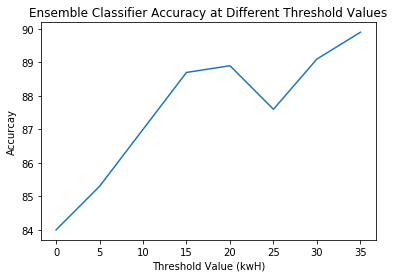

In [53]:
plt.title('Ensemble Classifier Accuracy at Different Threshold Values')
plt.xlabel('Threshold Value (kwH)')
plt.ylabel('Accurcay')
plt.plot(thresh, acc)
plt.show()

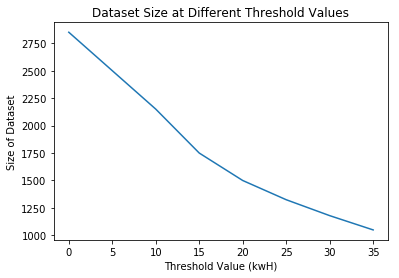

In [43]:
size = [2850, 2500, 2150, 1750, 1500, 1325, 1180, 1050]
plt.title('Dataset Size at Different Threshold Values')
plt.xlabel('Threshold Value (kwH)')
plt.ylabel('Size of Dataset')
plt.plot(thresh, size)
plt.show()